In [1]:
# a very simple way to predict digits from MNIST
# Christian Sutton
# christian(dot)sutton(at)gmail(dot)com
# MNIST library: https://github.com/hsjeong5/MNIST-for-Numpy

import numpy as np
import mnist
import matplotlib.pyplot as plt
import tqdm

In [2]:
# download the mnist images

mnist.init()

Download complete.
Save complete.


In [3]:
# load method, seperate into images and labels for training and test sets

x_train, t_train, x_test, t_test = mnist.load()

In [4]:
i,_ = x_train.shape
x_train_sq = np.reshape(x_train,([i,28,28]))

In [5]:
x_train_sq.shape

(60000, 28, 28)

In [6]:
t_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
# nums is a dictionary of numpy arrays - which training positions are 0,1,2..9

nums = {}
for i in range(10):
    nums[i] = t_train == i

In [8]:
nums[0]

array([False,  True, False, ..., False, False, False])

In [9]:
t_train[nums[0]]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

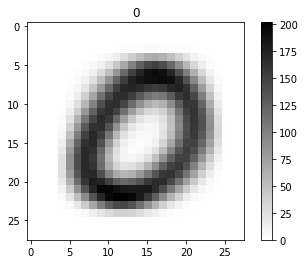

 10%|████████▎                                                                          | 1/10 [00:00<00:04,  2.00it/s]

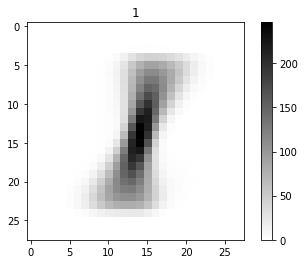

 20%|████████████████▌                                                                  | 2/10 [00:01<00:04,  1.79it/s]

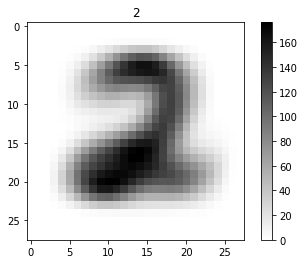

 30%|████████████████████████▉                                                          | 3/10 [00:01<00:03,  2.05it/s]

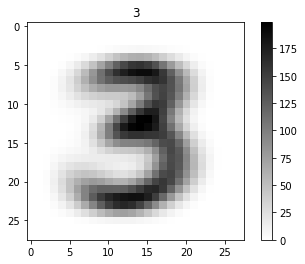

 40%|█████████████████████████████████▏                                                 | 4/10 [00:01<00:02,  2.07it/s]

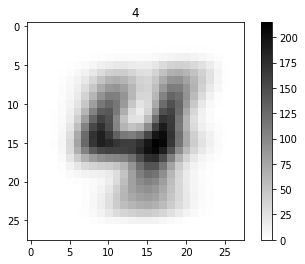

 50%|█████████████████████████████████████████▌                                         | 5/10 [00:02<00:02,  1.94it/s]

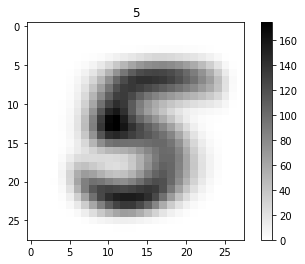

 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:02<00:01,  2.07it/s]

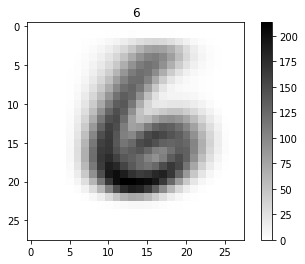

 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:03<00:01,  2.10it/s]

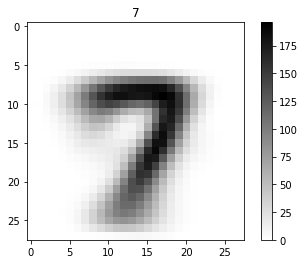

 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:03<00:00,  2.24it/s]

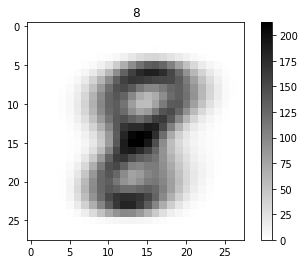

 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:04<00:00,  2.24it/s]

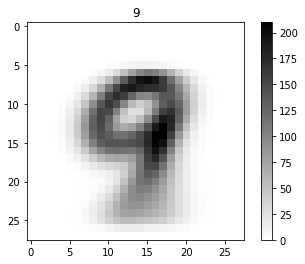

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.16it/s]


In [10]:
#lets look at the stack of all 0's, 1's ... 9's.

for i in tqdm.tqdm(range(10)):
    plt.title(f'{i}')
    plt.imshow(255 *x_train_sq[nums[i]].mean(axis = 0)/x_train_sq[nums[i]].max(),cmap='binary')
    plt.colorbar()
    plt.show()

In [11]:
# x_train_sq_stk is a dictionary of the normalized stacks of all the digis

x_train_sq_stk = {}
for i in tqdm.tqdm(range(10)):
    x_train_sq_stk[i] = 255 * x_train_sq[nums[i]].mean(axis = 0)//x_train_sq[nums[i]].max()

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 29.46it/s]


In [12]:
len(x_train_sq_stk)

10

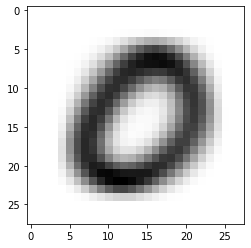

In [13]:
plt.imshow(x_train_sq_stk[0],cmap='binary')

In [14]:
i,_ = x_test.shape
print(i)

10000


In [15]:
x_test_sq = np.reshape(x_test,[i,28,28])
x_test_sq.shape

(10000, 28, 28)

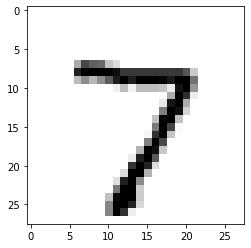

In [16]:
plt.imshow(x_test_sq[0],cmap='binary')

In [17]:
a = [1,3,2]

In [18]:
a.index(min(a))

0

In [19]:
# look at the first image in the test dataset..  loss function is the absolute sum of the difference between the 1st image 
# all the values in the stack.  The lowest value of the loss function corresponds to the "predicted" value

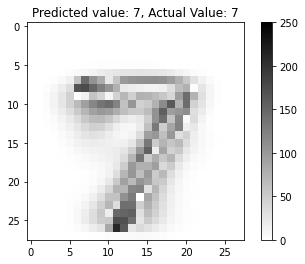

In [20]:
s = []
for i in range(10):
    s.append(np.sum((np.abs(x_test_sq[0] - x_train_sq_stk[i])))/784)

ind = s.index(min(s))
plt.imshow((np.abs(x_test_sq[0] - x_train_sq_stk[ind])),cmap='binary',vmin=0,vmax=250)
plt.colorbar()
plt.title(f'Predicted value: {ind}, Actual Value: {t_test[0]}')
plt.show()


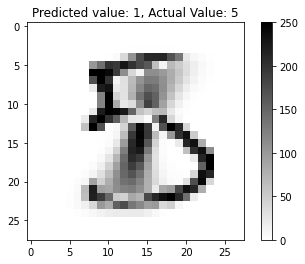

In [21]:
s = []
for i in range(10):
    s.append(np.sum((np.abs(x_test_sq[15] - x_train_sq_stk[i])))/784)

ind = s.index(min(s))
plt.imshow((np.abs(x_test_sq[15] - x_train_sq_stk[ind])),cmap='binary',vmin=0,vmax=250)
plt.colorbar()
plt.title(f'Predicted value: {ind}, Actual Value: {t_test[15]}')
plt.show()


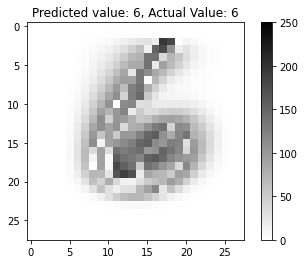

In [22]:
s = []
for i in range(10):
    s.append(np.sum((np.abs(x_test_sq[1990] - x_train_sq_stk[i])))/784)

ind = s.index(min(s))
plt.imshow((np.abs(x_test_sq[1990] - x_train_sq_stk[ind])),cmap='binary',vmin=0,vmax=250)
plt.colorbar()
plt.title(f'Predicted value: {ind}, Actual Value: {t_test[1990]}')
plt.show()


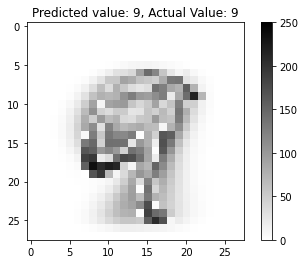

In [23]:
s = []
for i in range(10):
    s.append(np.sum((np.abs(x_test_sq[3001] - x_train_sq_stk[i])))/784)

ind = s.index(min(s))
plt.imshow((np.abs(x_test_sq[3001] - x_train_sq_stk[ind])),cmap='binary',vmin=0,vmax=250)
plt.colorbar()
plt.title(f'Predicted value: {ind}, Actual Value: {t_test[3001]}')
plt.show()


In [24]:
# do this for all 10k samples..

fin = []
for i in tqdm.tqdm(range(t_test.shape[0])):
    s = []
    for j in range(10):
        s.append(np.sum((np.abs(x_test_sq[i] - x_train_sq_stk[j])))/784)
    val = s.index(min(s))
    fin.append(val == t_test[i])

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:03<00:00, 3090.89it/s]


In [25]:
# so you can get roughly 2/3 of the digits right just using this method..  

sum(fin)/10000

0.671